In [1]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier

In [2]:
model = DecisionTreeClassifier(criterion="entropy")
path = "https://gist.githubusercontent.com/DiogoRibeiro7/c6590d0cf119e87c39e31c21a9c0f3a8/raw/4a8e3da267a0c1f0d650901d8295a5153bde8b21/PlayTennis.csv"
data = pd.read_csv(path)
data.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [3]:
df = pd.get_dummies(data)
df.head()

,Outlook_Overcast,Outlook_Rain,Outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Wind_Strong,Wind_Weak,Play Tennis_No,Play Tennis_Yes
0,0,0,1,0,1,0,1,0,0,1,1,0
1,0,0,1,0,1,0,1,0,1,0,1,0
2,1,0,0,0,1,0,1,0,0,1,0,1
3,0,1,0,0,0,1,1,0,0,1,0,1
4,0,1,0,1,0,0,0,1,0,1,0,1


In [4]:
from sklearn.model_selection import train_test_split
x,tx,y,ty = train_test_split(df.drop(["Play Tennis_No","Play Tennis_Yes"],axis=1),df["Play Tennis_Yes"],test_size=0.3)
model.fit(x,y)

DecisionTreeClassifier(criterion='entropy')

In [5]:
p = model.predict(tx)
model.score(tx,ty)

0.4

In [6]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ty,p)

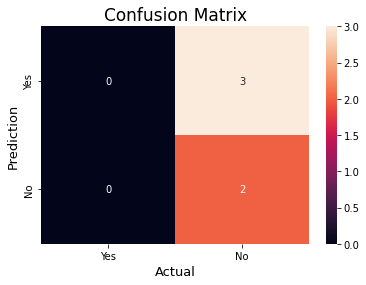

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Yes','No'],
            yticklabels=['Yes','No'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

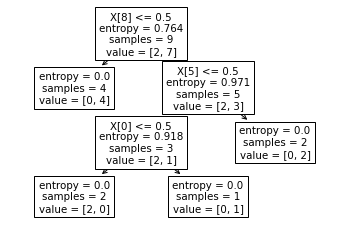

In [8]:
from sklearn import tree 
tree.plot_tree(model)
plt.show()